### Trigonometric 2D function fit
$$f(x,y) = \sin(x_1^2+x_2^2)$$

nel range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.


In [29]:
import numpy as np

def f(x1,x2):
        return np.sin(x1**2+x2**2)

Parametri generici:

In [30]:
n_train = 5000
sigma = 0.4 # noise standard deviation
n_epochs = 30

Generiamo i punti nel piano cartesiano che costituiranno il **training set** e **il validation set**.

In [78]:
n_valid = int(n_train/10)   # tipically the majority of the data is partitioned into the training set.

# generate training inputs
np.random.seed(0)

x_train = np.zeros((n_train, 2))
x_valid = np.zeros((n_valid, 2))

x_train = np.random.uniform(-1.5, 1.5, (n_train, 2))
x_valid = np.random.uniform(-1.5, 1.5, (n_valid, 2))

#x_valid.sort()


y_target = f(x_valid[:,0], x_valid[:,1])

y_train = np.random.normal(f(x_train[:,0], x_train[:,1]), sigma) 
y_valid = np.random.normal(f(x_valid[:,0], x_valid[:,1]), sigma)



Grafici del training set e del validation set rispetto alla funzione che stiamo considerando.

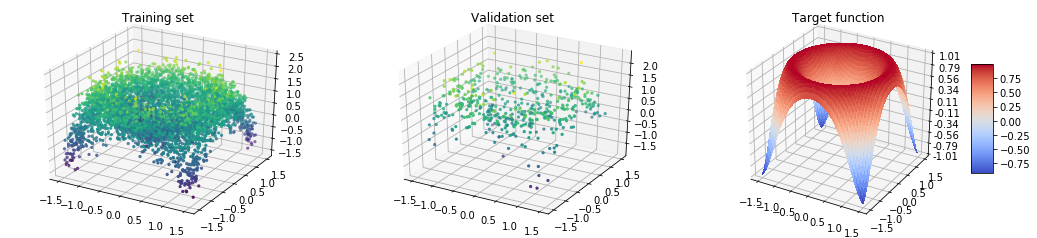

In [79]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

x1_train = x_train[:,0]
x2_train = x_train[:,1]
x1_valid = x_valid[:,0]
x2_valid = x_valid[:,1]



# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(18,4))#plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(x1_train, x2_train, y_train, c=y_train, marker='.')
ax.set_title('Training set')


#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter(x1_valid, x2_valid, y_valid, c=y_valid, marker='.')
ax.set_title('Validation set')

#ax.view_init(20, 30)

#===============
# Third subplot
#===============
# set up the axes for the third plot
ax = fig.add_subplot(1, 3, 3, projection='3d')
X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-1.5, 1.5, 0.01)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X**2 + Y**2)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Target function')

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


plt.show()

In [108]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(30, input_shape=(2,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
#model.add(Flatten())
model.add(Dense(1, activation='relu'))


# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])


history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=n_epochs,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Train on 5000 samples, validate on 500 samples
Epoch 1/30
5000/5000 [==============================] - 0s 77us/sample - loss: 0.3505 - mean_squared_error: 0.3505 - val_loss: 0.2988 - val_mean_squared_error: 0.2988
Epoch 2/30
5000/5000 [==============================] - 0s 30us/sample - loss: 0.3019 - mean_squared_error: 0.3019 - val_loss: 0.2956 - val_mean_squared_error: 0.2956
Epoch 3/30
5000/5000 [==============================] - 0s 30us/sample - loss: 0.2951 - mean_squared_error: 0.2951 - val_loss: 0.2959 - val_mean_squared_error: 0.2959
Epoch 4/30
5000/5000 [==============================] - 0s 30us/sample - loss: 0.2898 - mean_squared_error: 0.2898 - val_loss: 0.2869 - val_mean_squared_error: 0.2869
Epoch 5/30
5000/5000 [==============================] - 0s 30us/sample - loss: 0.2856 - mean_squared_error: 0.2856 - val_loss: 0.2836 - val_mean_squared_error: 0.2836
Epoch 6/30
5000/5000 [==============================] - 0s 30us/sample - loss: 0.2812 - mean_squared_error: 0.2812 - v

In [109]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

500/500 [==============================] - 0s 56us/sample - loss: 0.1992 - mean_squared_error: 0.1992

Test loss: 0.19917526268959046
Test accuracy: 0.19917525


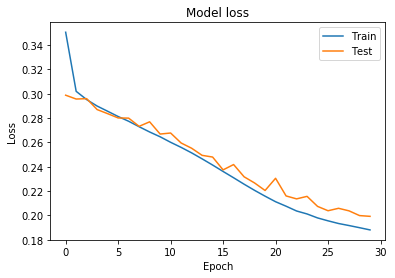

In [110]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

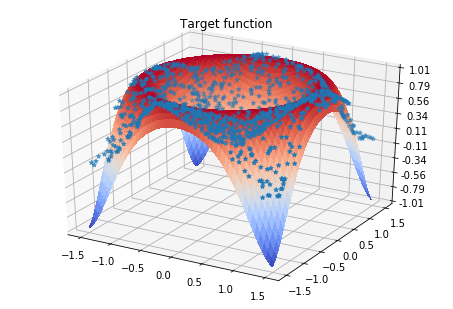

In [118]:
x_predicted = np.random.uniform(-1.5, 1.5, (1000, 2))
y_predicted = model.predict(x_predicted)


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, marker='*')

X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-1.5, 1.5, 0.01)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X**2 + Y**2)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Target function')

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig1.colorbar(surf, shrink=0.5, aspect=5)


plt.show()